# Эффективность структур данных в питоне

## Списки

Операция Эффективность<br />
index []	O(1)<br />
Присваивание по индексу	O(1)<br />
append	O(1)<br />
pop()	O(1)<br />
pop(i)	O(n)<br />
insert(i,item)	O(n)<br />
оператор del	O(n)<br />
итерирование	O(n)<br />
вхождение (in)	O(n)<br />
срез [x:y]	O(k)<br />
удалить срез	O(n)<br />
задать срез	O(n+k)<br />
обратить	O(n)<br />
конкантенация	O(k)<br />
сортировка	O(n log n)<br />
размножить	O(nk)<br />

## Словари

операция	эффективность<br />
копирование	O(n)<br />
получить элемент	O(1)<br />
записать элемент	O(1)<br />
удалить элемент	O(1)<br />
вхождение (in)	O(1)<br />
итерация	O(n)<br />

# Основные структуры данных

### Стек

Стек (иногда говорят “магазин” - по аналогии с магазином огнестрельного оружия) - это упорядоченная коллекция элементов, где добавление нового или удаление существующего всегда происходит только на одном из концов. Этот конец обычно называют “вершиной”, а противоположный ему - “основанием”.

Значимость основания стека заключается в том, что хранящиеся ближе к нему элементы представляют из себя те, которые находятся в стеке дольше всего. Элемент, добавленный последним, расположен на той позиции, с которой будет удалён в первую очередь. Такой принцип организации иногда называется LIFO, last-in, first-out (англ. «последним пришёл — первым вышел»). Он предоставляет упорядочение по времени нахождения в коллекции. Более новые элементы расположены ближе к вершине, более старые - ближе к основанию.

In [2]:
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items)-1]
    def size(self):
        return len(self.items)

In [3]:
s=Stack()

print(s.isEmpty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.isEmpty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())

True
dog
3
False
8.4
True
2


Простые сбалансированные скобки

In [9]:
def parChecker(symbolString):
    s = Stack()
    balanced = True
    index = 0
    while index < len(symbolString):
        symbol = symbolString[index]
        if symbol == "(":
            s.push(symbol)
            balanced = False
        else:
            if symbol == ")":
                s.pop()
                balanced = True 
        index = index + 1
    if balanced and s.isEmpty():
        return True
    else:
        return False

print(parChecker('((()))'))
print(parChecker('qqweqwe((()))'))
print(parChecker('(((((klhglkjgh)'))
print(parChecker('((()))'))
print(parChecker('fdgdsafg((()))'))

True
True
False
True
True


Сбалансированные символы (общий случай)

In [36]:
def parChecker(symbolString):
    s = Stack()
    balanced = True
    index = 0
    while index < len(symbolString):
        symbol = symbolString[index]
        if symbol in "([{":
            s.push(symbol)
            balanced = False
        else:
            if s.isEmpty():
                balanced = False
            else:
                top = s.pop()
                if not matches(top,symbol):
                       balanced = False
                else:
                    balanced = True
        index = index + 1
    if balanced and s.isEmpty():
        return True
    else:
        return False

def matches(open,close):
    opens = "([{"
    closers = ")]}"
    return opens.index(open) == closers.index(close)


print(parChecker('{{([][])}()}'))
print(parChecker('[{()]'))

True
False


In [50]:
def parChecker(symbolString):
    s = Stack()
    balanced = True
    index = 0
    while index < len(symbolString) and balanced:
        symbol = symbolString[index]
        if symbol in "([{":
            s.push(symbol)
        else:
            if s.isEmpty():
                balanced = False
            else:
                top = s.pop()
                if not matches(top,symbol):
                       balanced = False
        index = index + 1
    if balanced and s.isEmpty():
        return "YES"
    else:
        return "NO"

def matches(open,close):
    opens = "([{"
    closers = ")]}"
    return opens.index(open) == closers.index(close)

print(parChecker('{{([][])}()}'))
print(parChecker('[{()]'))

YES
NO


Конвертирование десятичных чисел в двоичные<br />
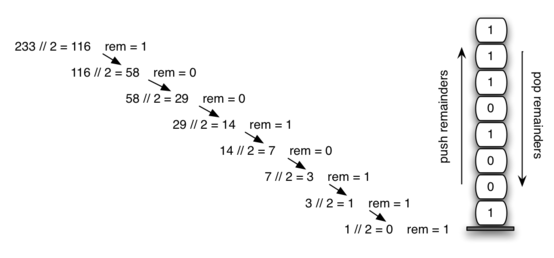

In [40]:
def divideBy2(decNumber):
    remstack = Stack()

    while decNumber > 0:
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2

    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())

    return binString

print(divideBy2(42))

101010


Функция divideBy2 может быть модифицирована, чтобы принимать не только десятичное значение, но и основание для желаемого преобразования. Идея “Разделяй на 2” просто заменяется на более общую “Разделяй на основание”. Новая функция под названием baseConverter, показанная в ActiveCode 7, принимает в качестве параметров десятичное число и любое основание между 2 и 16. Остатки по-прежнему помещаются в стек до тех пор, пока конвертируемое значение не станет равным нулю. Аналогичная техника конструирования слева направо может использоваться с одним небольшим изменением. От основания 2 до 10 для чисел нужно максимум 10 цифр, так что обычные символы 0, 1, 2, 3, 4, 5, 6, 7, 8 и 9 работают нормально. Проблемы возникают, когда мы выходим за основание 10. Мы больше не можем использовать остатки, поскольку они сами представляются как двуциферные десятичные числа. Вместо них мы должны создать свой набор цифр, которые можно использовать для представления таких остатков за пределами 9.

In [15]:
def baseConverter(decNumber,base):
    digits = "0123456789ABCDEF"

    remstack = Stack()

    while decNumber > 0:
        rem = decNumber % base
        remstack.push(rem)
        decNumber = decNumber // base

    newString = ""
    while not remstack.isEmpty():
        newString = newString + digits[remstack.pop()]

    return newString

print(baseConverter(25,2))
print(baseConverter(25,16))

11001
19


### Очередь

Очередь - это упорядоченная коллекция элементов, в которой добавление новых происходит с одного конца, называемого “хвост очереди”, а удаление существующих - с другого, “головы очереди”. Как только элемент добавляется в конец очереди, он начинает свой путь к её началу, ожидая удаления предыдущих.

Самые последние из добавленных в очередь единиц должны ждать в конце коллекции. Элемент, который пробыл в очереди дольше всего, находится в её начале. Такой принцип упорядочения иногда называют FIFO, first-in first-out (англ. “первым пришёл - первым вышел”). Ещё он известен, как “первым пришёл - первым обслужен”.

In [16]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

Hot potato<br />
Одно из типичных приложений для демонстрации очереди в действии - это симуляция реальной ситуации, которая требует управления данными в манере FIFO. Для начала давайте рассмотрим детскую игру Hot Potato. В этой игре (см. рисунок 2) дети выстраиваются в круг и перебрасывают предмет от соседа к соседу так быстро, как только могут. В некоторый момент игры действие останавливается, и ребёнок, у которого в руках остался предмет (картошка), выбывает из круга. Игра продолжается до тех пор, пока не останется единственный победитель.
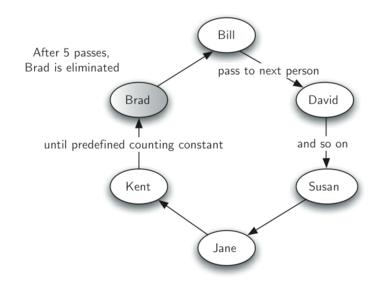

In [17]:
def hotPotato(namelist, num):
    simqueue = Queue()
    for name in namelist:
        simqueue.enqueue(name)

    while simqueue.size() > 1:
        for i in range(num):
            simqueue.enqueue(simqueue.dequeue())

        simqueue.dequeue()

    return simqueue.dequeue()

print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],7))


Susan


### Дек

Дек, также называемый двусторонней очередью, - это упорядоченная коллекция элементов, подобная очереди. Он имеет два конца (голову и хвост), и его элементы остаются позиционированными. Что отличает дек, так это нестрогая природа добавления и удаления его составляющих. Новые элементы могут быть добавлены как в голову, так и в хвост. Аналогично, существующие компоненты могут удаляться из обоих концов. В каком-то смысле, этот гибрид линейной структуры объединяет все возможности стеков и очередей. Рисунок 1 демонстрирует дек из объектов данных Python.
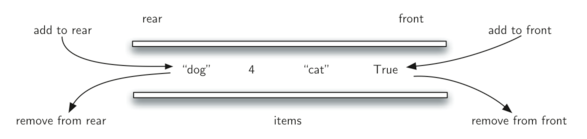

In [19]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)
    
    
d=Deque()
print(d.isEmpty())
d.addRear(4)
d.addRear('dog')
d.addFront('cat')
d.addFront(True)
print(d.size())
print(d.isEmpty())
d.addRear(8.4)
print(d.removeRear())
print(d.removeFront())

True
4
False
8.4
True


Проверка палиндрома

Интересная задача, которая может быть легко решена с использованием структуры данных “дек” - это классическая задача палиндрома. Палиндромом называют строку, которая одинаково читается справа налево и слева направо. Например, radar, toot или madam. Мы хотим создать алгоритм, принимающий на вход строку символов и проверяющий, является ли она палиндромом.

In [20]:
def palchecker(aString):
    chardeque = Deque()

    for ch in aString:
        chardeque.addRear(ch)

    stillEqual = True

    while chardeque.size() > 1 and stillEqual:
        first = chardeque.removeFront()
        last = chardeque.removeRear()
        if first != last:
            stillEqual = False

    return stillEqual

print(palchecker("lsdkjfskf"))
print(palchecker("radar"))

False
True


### Списки (linked list)

Для реализации неупорядоченного списка мы создадим то, что обычно называют связанным списком. Напомним: мы должны быть уверены, что сможем поддерживать порядок взаимного расположения элементов. Однако, такое позиционирование не обязательно должно быть на смежных участках памяти. Рассмотрим для примера коллекцию элементов, показанную на рисунке 1. Похоже, эти значения были размещены случайным образом. Если мы сможем сохранить в каждом элементе некую явную информацию о размещении его соседа (см. рисунок 2), то соответствующая позиция каждого из них может быть выражена простой ссылкой от одного к другому.
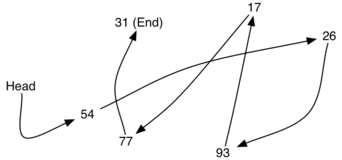

In [21]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext

In [22]:
class UnorderedList:

    def __init__(self):
        self.head = None
    
    def isEmpty(self):
        return self.head == None
    
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count
    
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found
    
    def remove(self,item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

In [23]:
mylist = UnorderedList()

mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

print(mylist.size())
print(mylist.search(93))
print(mylist.search(100))

mylist.add(100)
print(mylist.search(100))
print(mylist.size())

mylist.remove(54)
print(mylist.size())
mylist.remove(93)
print(mylist.size())
mylist.remove(31)
print(mylist.size())
print(mylist.search(93))

6
True
False
True
7
6
5
4
False


### Упорядоченный список (linked list) 

In [24]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext


class OrderedList:
    def __init__(self):
        self.head = None

    def search(self,item):
        current = self.head
        found = False
        stop = False
        while current != None and not found and not stop:
            if current.getData() == item:
                found = True
            else:
                if current.getData() > item:
                    stop = True
                else:
                    current = current.getNext()

        return found

    def add(self,item):
        current = self.head
        previous = None
        stop = False
        while current != None and not stop:
            if current.getData() > item:
                stop = True
            else:
                previous = current
                current = current.getNext()

        temp = Node(item)
        if previous == None:
            temp.setNext(self.head)
            self.head = temp
        else:
            temp.setNext(current)
            previous.setNext(temp)

    def isEmpty(self):
        return self.head == None

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count


mylist = OrderedList()
mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

print(mylist.size())
print(mylist.search(93))
print(mylist.search(100))


6
True
False


In [ ]:
s = Stack()
for j in range(0, times):
    a, b = map(int, input().split())
    if a == 1:
        s.push(b)
    elif a == 2:
        s.pop()
    elif a == 3:
        print(s.peek())